# Notebook #1


### Name: Tulsi Patel


### Date: 11.08.2021


### PID: 730392259


### Goal: Filter and create a spike raster for Sst-IRES/Female/VISp/Natural Scenes in Brain Observatory 1.1. Modify the 10.27 graph by altering the firing rate threshold according to Allen metrics. Attempt to make a firing rate graph for Sst-IRES/Female/VISp/Natural Scenes in Brain Observatory 1.1. 

## Protocol

### Starting code. 

In [1]:
import os

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.brain_observatory.ecephys.ecephys_session import (
    EcephysSession
)
from allensdk.brain_observatory.ecephys.visualization import plot_mean_waveforms, plot_spike_counts, raster_plot
from allensdk.brain_observatory.visualization import plot_running_speed

# tell pandas to show all columns when we display a DataFrame
pd.set_option("display.max_columns", None)

In [2]:
data_directory = '/Users/tulsipatel/local1/ecephys_cache_dir' 
# must be updated to a valid directory in your filesystem

manifest_path = os.path.join(data_directory, "manifest.json")

In [3]:
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [4]:
units = cache.get_units()

In [5]:
len(units)

40010

### Allen automatically puts these filters:


#### isi_violations < 0.5


#### amplitude_cutoff < 0.1


#### presence_ratio > 0.9

## Removing filters. Units with invalid waveforms are not included. 

In [6]:
units = cache.get_units(amplitude_cutoff_maximum = np.inf,
                        presence_ratio_minimum = -np.inf,
                        isi_violations_maximum = np.inf)

len(units)

99180

### Function for plotting each metric

In [7]:
from scipy.ndimage.filters import gaussian_filter1d
plt.rcParams.update({'font.size': 14})

def plot_metric(data, bins, x_axis_label, color, max_value=-1):
    
    h, b = np.histogram(data, bins=bins, density=True)

    x = b[:-1]
    y = gaussian_filter1d(h, 1)

    plt.plot(x, y, color=color)
    plt.xlabel(x_axis_label)
    plt.gca().get_yaxis().set_visible(False)
    [plt.gca().spines[loc].set_visible(False) for loc in ['right', 'top', 'left']]
    if max_value < np.max(y) * 1.1:
        max_value = np.max(y) * 1.1
    plt.ylim([0, max_value])
    
    return max_value

### Filtered the units in the most up-to-date way so far. *Includes other areas besides VISp. Still need to further filter based on horizontal/vetical position of probe.

In [8]:
filtered_units = units[(units.ecephys_session_id == 760693773) & \
                             (units.ecephys_probe_id == 769322827)]

filtered_units.head()

,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cumulative_drift,d_prime,waveform_duration,ecephys_channel_id,firing_rate,waveform_halfwidth,isi_violations,isolation_distance,L_ratio,max_drift,nn_hit_rate,nn_miss_rate,presence_ratio,waveform_recovery_slope,waveform_repolarization_slope,silhouette_score,snr,waveform_spread,waveform_velocity_above,waveform_velocity_below,ecephys_probe_id,local_index,probe_horizontal_position,probe_vertical_position,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,ecephys_structure_id,ecephys_structure_acronym,ecephys_session_id,lfp_sampling_rate,name,phase,sampling_rate,has_lfp_data,date_of_acquisition,published_at,specimen_id,session_type,age_in_days,sex,genotype
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
951784001,0.540655,252.171075,0.004041,89.58,3.350699,0.467002,850088108,11.693485,0.233501,0.031679,34.013728,0.034719,8.84,0.736000,0.022135,0.99,-0.144156,0.814666,NaN,4.413774,40.0,0.068677,NaN,769322827,1,11,20,NaN,NaN,NaN,8.0,grey,760693773,1249.999938,probeC,3a,29999.998505,True,2018-10-26T19:59:23Z,2019-10-03T00:00:00Z,738651054,brain_observatory_1.1,110.0,F,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
951784021,0.594808,163.236645,0.107558,149.17,2.920572,0.467002,850088108,10.682439,0.219765,0.138629,36.738311,0.039571,11.57,0.631333,0.032768,0.99,-0.104319,0.527494,0.110372,2.889925,40.0,-0.686767,NaN,769322827,1,11,20,NaN,NaN,NaN,8.0,grey,760693773,1249.999938,probeC,3a,29999.998505,True,2018-10-26T19:59:23Z,2019-10-03T00:00:00Z,738651054,brain_observatory_1.1,110.0,F,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
951784067,0.491879,200.821920,0.046125,256.40,2.483062,0.659296,850088108,4.977426,0.260972,0.106157,20.708520,0.075695,31.30,0.409550,0.024489,0.99,-0.074260,0.589484,0.018515,3.261199,50.0,-0.480737,NaN,769322827,1,11,20,NaN,NaN,NaN,8.0,grey,760693773,1249.999938,probeC,3a,29999.998505,True,2018-10-26T19:59:23Z,2019-10-03T00:00:00Z,738651054,brain_observatory_1.1,110.0,F,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
951784081,0.689164,154.027965,0.262793,164.93,2.484721,0.453266,850088108,9.047718,0.206030,0.259383,31.909993,0.038848,8.77,0.571333,0.032620,0.99,-0.137072,0.502546,0.007180,2.659234,40.0,0.000000,NaN,769322827,1,11,20,NaN,NaN,NaN,8.0,grey,760693773,1249.999938,probeC,3a,29999.998505,True,2018-10-26T19:59:23Z,2019-10-03T00:00:00Z,738651054,brain_observatory_1.1,110.0,F,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
951784094,0.625595,169.246935,0.485968,319.96,1.855977,0.508208,850088108,1.813135,0.233501,3.548901,12.928637,0.107926,31.86,0.148990,0.006519,0.99,-0.094404,0.527099,0.057767,1.638100,50.0,0.000000,NaN,769322827,1,11,20,NaN,NaN,NaN,8.0,grey,760693773,1249.999938,probeC,3a,29999.998505,True,2018-10-26T19:59:23Z,2019-10-03T00:00:00Z,738651054,brain_observatory_1.1,110.0,F,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt


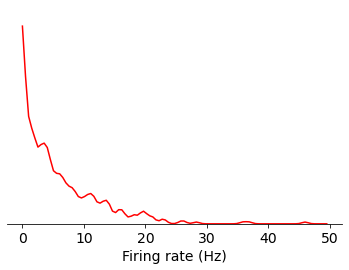

In [9]:
data = filtered_units['firing_rate']
bins = np.linspace(0,50,100)

max_value = plot_metric(data, bins, 'Firing rate (Hz)', 'red')

### So many units with low firing rates. Make log plot to clearly see units with high firing rates. 

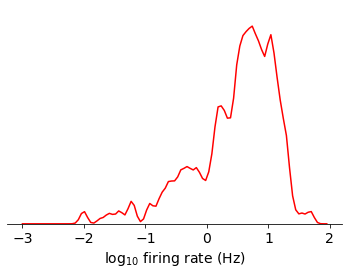

In [10]:
data = np.log10(filtered_units['firing_rate'])
bins = np.linspace(-3,2,100)

max_value = plot_metric(data, bins, 'log$_{10}$ firing rate (Hz)', 'red')

### Looks spiky because some units are missing spikes "as a result of thresholding or drift". Filter out using nn_hit_rate. 

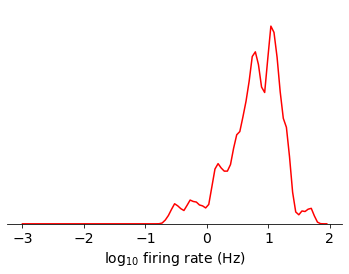

In [11]:
data = np.log10(filtered_units[filtered_units.nn_hit_rate > 0.9]['firing_rate'])
bins = np.linspace(-3,2,100)

max_value = plot_metric(data, bins, 'log$_{10}$ firing rate (Hz)', 'red')

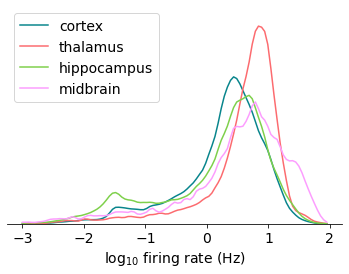

In [12]:
region_dict = {'cortex' : ['VISp', 'VISl', 'VISrl', 'VISam', 'VISpm', 'VIS', 'VISal','VISmma','VISmmp','VISli'],
             'thalamus' : ['LGd','LD', 'LP', 'VPM', 'TH', 'MGm','MGv','MGd','PO','LGv','VL',
              'VPL','POL','Eth','PoT','PP','PIL','IntG','IGL','SGN','VPL','PF','RT'],
             'hippocampus' : ['CA1', 'CA2','CA3', 'DG', 'SUB', 'POST','PRE','ProS','HPF'],
             'midbrain': ['MB','SCig','SCiw','SCsg','SCzo','PPT','APN','NOT','MRN','OP','LT','RPF','CP']}

color_dict = {'cortex' : '#08858C',
              'thalamus' : '#FC6B6F',
              'hippocampus' : '#7ED04B',
              'midbrain' : '#FC9DFE'}

bins = np.linspace(-3,2,100)
max_value = -np.inf

for idx, region in enumerate(region_dict.keys()):
    
    data = np.log10(units[units.ecephys_structure_acronym.isin(region_dict[region])]['firing_rate'])
    
    max_value = plot_metric(data, bins, 'log$_{10}$ firing rate (Hz)', color_dict[region], max_value)
    
_ = plt.legend(region_dict.keys())

# Firing rate plot in Sst-IRES/Female/VISp/Natural Scenes in Brain Observatory 1.1.
## XXX: Was VISp actually isolated or are there other areas included?

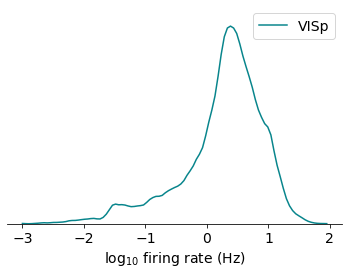

In [13]:
region_dict = {'VISp' : ['VISp']}

color_dict = {'VISp' : '#08858C'}

bins = np.linspace(-3,2,100)
max_value = -np.inf

for idx, region in enumerate(region_dict.keys()):
    
    data = np.log10(units[units.ecephys_structure_acronym.isin(region_dict[region])]['firing_rate'])
    
    max_value = plot_metric(data, bins, 'log$_{10}$ firing rate (Hz)', color_dict[region], max_value)
    
_ = plt.legend(region_dict.keys())

In [ ]:
### XXX: 

## Resources Used


### https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_quality_metrics.html#Firing-rate